# Construction of a simple multiplayer Perceptron with two INPUT and one OUTPUT (from SCRATCH)

Written by - Abirlal Metya (14-02-2021)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

### Activation

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [51]:
### This is to generate a complex relation between x1 and x2 ###

### We will try to predict this complex relationship using NN ####

def compu(data):
    #return (data[:,0]*data[:,1])+((data[:,0]**2)*(data[:,1]**2))
    return (data[:,0]**2)*(data[:,1]**2)

#### Feed same input

In [52]:
size = 500
radn = np.random.randint(100,700,size=size)/1000

input_set = radn.reshape(250,2)
#labels    = (input_set[:,0]*input_set[:,1])
labels    = compu(input_set)

labels    = labels.reshape(labels.shape[0],1)
y         = labels.copy()

X = input_set.copy()
X = X.T

y = y.T

#### Initialize the weights and biases

In [53]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.2
epochs = 10000

#### Construction of the model

In [54]:
losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations     = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)
    #print(output.shape)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.23369
Error at epoch 100 is 0.00175
Error at epoch 200 is 0.00071
Error at epoch 300 is 0.00039
Error at epoch 400 is 0.00030
Error at epoch 500 is 0.00024
Error at epoch 600 is 0.00020
Error at epoch 700 is 0.00017
Error at epoch 800 is 0.00015
Error at epoch 900 is 0.00013
Error at epoch 1000 is 0.00012
Error at epoch 1100 is 0.00011
Error at epoch 1200 is 0.00010
Error at epoch 1300 is 0.00009
Error at epoch 1400 is 0.00009
Error at epoch 1500 is 0.00008
Error at epoch 1600 is 0.00007
Error at epoch 1700 is 0.00007
Error at epoch 1800 is 0.00007
Error at epoch 1900 is 0.00006
Error at epoch 2000 is 0.00006
Error at epoch 2100 is 0.00006
Error at epoch 2200 is 0.00005
Error at epoch 2300 is 0.00005
Error at epoch 2400 is 0.00005
Error at epoch 2500 is 0.00005
Error at epoch 2600 is 0.00005
Error at epoch 2700 is 0.00004
Error at epoch 2800 is 0.00004
Error at epoch 2900 is 0.00004
Error at epoch 3000 is 0.00004
Error at epoch 3100 is 0.00004
Error at epoch 3200 

In [55]:
# calculating hidden layer activations
size = 400
radn = np.random.randint(100,700,size=size)/1000

pred = radn.reshape(200,2).T
pred_ = pred.T

hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, pred)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

# calculating the output
outputLayer_linearTransform = np.dot(
    weights_hidden_output.T, hiddenLayer_activations
)
output = sigmoid(outputLayer_linearTransform)

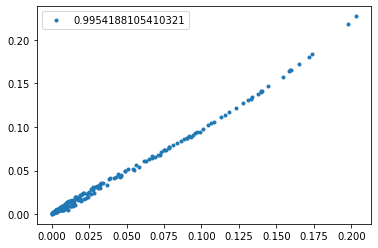

In [56]:
plt.plot(output.T,compu(pred_),'.',label=str(np.corrcoef(output,compu(pred_))[0,1]**2))
#plt.ylim(0,0.02)
plt.legend()

#### contd. to presentation